<a href="https://colab.research.google.com/github/tkota0726/Generative-Adversarial-Networks-for-financial-time-series-generation/blob/master/Classification/NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import gspread
import seaborn as sns
import numpy as np

# Verification
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# 'InputForClassification' First sheet
worksheet_arc = gc.open('InputForClassification').get_worksheet(0)

df_arc = pd.DataFrame(worksheet_arc.get_all_values())
df_arc = df_arc.set_index(0)

# 'InputForClassification' Second sheet
worksheet_node = gc.open('InputForClassification').get_worksheet(1)
df_node = pd.DataFrame(worksheet_node.get_all_values())
df_node = df_node.rename(columns={0:"Index"})
df_node = df_node.set_index("Index")

# Setting for network


In [0]:
# sig


import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

data = [["1","2"],["1","5"],["2","3"],["2","4"],["2","13"],["4","11"],["4","12"],["5","6"],["6","7"],["7","8"],["8","9"],["9","10"],["10","11"],["12","13"],["13","14"]]

# G = pypsa.G()
G = nx.DiGraph()



# #add Nodes
G.add_node("node1", pos=(1,5))
G.add_node("node2", pos=(2,5))
G.add_node("node3", pos=(3,5))
G.add_node("node4", pos=(5,5))
G.add_node("node5", pos=(1,4))
G.add_node("node6", pos=(1,2))
G.add_node("node7", pos=(2,2))
G.add_node("node8", pos=(4,2))
G.add_node("node9", pos=(5,2))
G.add_node("node10", pos=(6,3))
G.add_node("node11", pos=(6,4))
G.add_node("node12", pos=(3,6))
G.add_node("node13", pos=(2,6))
G.add_node("node14", pos=(1.5,7))
           
#Add Edges
for d in data:
    G.add_edge("node{}".format(d[0]),"node{}".format(d[1]))

# Show the arc data head

## Arc Table

In [314]:
df_arc.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
Arc,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Flag
Node x,node1,node1,node2,node2,node2,node4,node4,node5,node6,node7,node8,node9,node10,node12,node13,
Node y,node2,node5,node3,node4,node13,node11,node12,node6,node7,node8,node9,node10,node11,node13,node14,
"Transmission length, km",2,3,2,5,4,8,3,3,5,6,3,3,3,2,2,
"Transmission voltage,kV",10,35,110,110,110,110,110,10,10,110,110,110,110,110,35,


## Node Table

In [315]:
df_node.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Index,,,,,,,,,,,,,,,
Node,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12,node13,node14,Flag
"Voltage level, kV",110/10,110/35/10/6,110/35/6,110/35/6,110/10,35/6,110/35/6,110/35/6,-653504,110/35/10,110/10,110/10,110/35/6,35/6,
Generation [0/1],0,1,0,0,0,0,1,0,0,1,1,0,0,0,
"Generation, kWh",0,925,0,0,0,0,1000,0,0,2000,1000,0,0,0,
"Generation Capacity, MW",0,0.925,0,0,0,0,1,0,0,2,1,0,0,0,


## Drop unnecessary row and columns

## Arc Table

In [316]:
df_arc = df_arc.drop(16, axis=1)
df_arc = df_arc.drop("Arc", axis=0)
df_arc.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
Node x,node1,node1,node2,node2,node2,node4,node4,node5,node6,node7,node8,node9,node10,node12,node13
Node y,node2,node5,node3,node4,node13,node11,node12,node6,node7,node8,node9,node10,node11,node13,node14
"Transmission length, km",2,3,2,5,4,8,3,3,5,6,3,3,3,2,2
"Transmission voltage,kV",10,35,110,110,110,110,110,10,10,110,110,110,110,110,35
"Line type[1,2,3,4,5]",1,2,3,5,5,3,5,1,1,5,3,5,5,5,2


## Node Table

In [317]:
df_node = df_node.drop(15, axis=1)
df_node = df_node.drop("Node", axis=0)

df_node.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Index,,,,,,,,,,,,,,
"Voltage level, kV",110/10,110/35/10/6,110/35/6,110/35/6,110/10,35/6,110/35/6,110/35/6,-653504,110/35/10,110/10,110/10,110/35/6,35/6
Generation [0/1],0,1,0,0,0,0,1,0,0,1,1,0,0,0
"Generation, kWh",0,925,0,0,0,0,1000,0,0,2000,1000,0,0,0
"Generation Capacity, MW",0,0.925,0,0,0,0,1,0,0,2,1,0,0,0
"Interrupted capacity, MW",0,0.0007452935718,0,0,0,0,0.0008057227803,0,0,0.001611445561,0.0008057227803,0,0,0


## Transpose the table

In [318]:
df_arc = df_arc.T
df_arc.head()

,Node x,Node y,"Transmission length, km","Transmission voltage,kV","Line type[1,2,3,4,5]","Line type[1:Cable,2:OHL]",Pole type,Life expectancy value,Conductor 1,Conductor 2,...,"Average frequency of faults for line type, faults/km per year","Average fault duration, h/fault","Frequency of faults, faults/km per year","Fault duration, h/fault","Investment value, €","Investment value, €/km","Repair costs value, €","Repair costs value, €/km","Maintenance costs value, €","Maintenance costs value, €/km per year"
1,node1,node2,2,10,1,1,1,0.1111111111,1,5,...,0.045,4,0.045,7.6,22500,11250,9000,4500,15,7.5
2,node1,node5,3,35,2,1,1,0.1111111111,1,5,...,0.05,5,0.05,9.5,25500,8500,12750,4250,52.5,17.5
3,node2,node3,2,110,3,2,2,1,3,5,...,0.06,8,0.072,15.2,633750,316875,496875,248437.5,36165,18082.5
4,node2,node4,5,110,5,2,2,1,3,5,...,0.06,8,0.0612,13.32,1502820,300564,1191564,238312.8,90165,18033
5,node2,node13,4,110,5,2,2,1,3,5,...,0.06,8,0.0636,15.76,909440,227360,719488,179872,72165,18041.25


In [319]:
df_node = df_node.T
df_node.head()

Index,"Voltage level, kV",Generation [0/1],"Generation, kWh","Generation Capacity, MW","Interrupted capacity, MW",Probability of loss of capacity,"Transformer, pcs [0,1,2]","Transformer type [1,2,3]",Transfromer life expectancy value,"Conductor weight value, kg/Trfo",...,EIR value,Investment value,Repair costs value (construction cost),Maintenance costs value,"Investment value, €","Investment value, €/km","Repair costs value, €","Repair costs value, €/km","Maintenance costs value, €","Maintenance costs value, €/km per year"
1,110/10,0,0,0,0,0,1,1,0.2222222222,0.6095670468,...,0.6875,0.5617099563,0.5921052632,0.6681514477,51340,25670,6340,3170,2340,1170
2,110/35/10/6,1,925,0.925,0.0007452935718,0.003670570841,2,4,0.2222222222,1,...,0.578125,1,1,1,132400,44133.33333,15400,5133.333333,5000,1666.666667
3,110/35/6,0,0,0,0,0,1,2,0.2222222222,0.5699258111,...,0.578125,0.2668789935,0.3490304709,0.5545657016,26500,13250,4000,2000,2000,1000
4,110/35/6,0,0,0,0,0,1,2,0.2222222222,0.5699258111,...,0.328125,0.07815869122,0.09972299169,0.153674833,26500,5300,4000,800,2000,400
5,110/10,0,0,0,0,0,1,1,0.2222222222,0.6095670468,...,0.4583333333,0.2570275563,0.2628116343,0.2772828508,51340,12835,6340,1585,2340,585


## Change the index name

In [323]:
df_arc.index = ["arc1", "arc2", "arc3", "arc4", "arc5", "arc6", "arc7", "arc8", "arc9", "arc10", "arc11", "arc12", "arc13", "arc14", "arc15"]
df_arc.iloc[:,3:].apply(pd.to_numeric)
df_arc.head()

,Node x,Node y,"Transmission length, km","Transmission voltage,kV","Line type[1,2,3,4,5]","Line type[1:Cable,2:OHL]",Pole type,Life expectancy value,Conductor 1,Conductor 2,...,"Average frequency of faults for line type, faults/km per year","Average fault duration, h/fault","Frequency of faults, faults/km per year","Fault duration, h/fault","Investment value, €","Investment value, €/km","Repair costs value, €","Repair costs value, €/km","Maintenance costs value, €","Maintenance costs value, €/km per year"
arc1,node1,node2,2,10,1,1,1,0.1111111111,1,5,...,0.045,4,0.045,7.6,22500,11250,9000,4500,15,7.5
arc2,node1,node5,3,35,2,1,1,0.1111111111,1,5,...,0.05,5,0.05,9.5,25500,8500,12750,4250,52.5,17.5
arc3,node2,node3,2,110,3,2,2,1,3,5,...,0.06,8,0.072,15.2,633750,316875,496875,248437.5,36165,18082.5
arc4,node2,node4,5,110,5,2,2,1,3,5,...,0.06,8,0.0612,13.32,1502820,300564,1191564,238312.8,90165,18033
arc5,node2,node13,4,110,5,2,2,1,3,5,...,0.06,8,0.0636,15.76,909440,227360,719488,179872,72165,18041.25


In [321]:
df_node.index = ["node1", "node2", "node3", "node4", "node5", "node6", "node7", "node8", "node9", "node10", "node11", "node12", "node13", "node14"]
df_node.iloc[:,3:].apply(pd.to_numeric)


Index,"Generation Capacity, MW","Interrupted capacity, MW",Probability of loss of capacity,"Transformer, pcs [0,1,2]","Transformer type [1,2,3]",Transfromer life expectancy value,"Conductor weight value, kg/Trfo","Trafo oil weight value, kg/Trfo",SG type 1,SG type 2,...,EIR value,Investment value,Repair costs value (construction cost),Maintenance costs value,"Investment value, €","Investment value, €/km","Repair costs value, €","Repair costs value, €/km","Maintenance costs value, €","Maintenance costs value, €/km per year"
node1,0.000,0.000000,0.000000,1,1,0.222222,0.609567,0.562581,1,2,...,0.687500,0.561710,0.592105,0.668151,51340,25670.000000,6340,3170.000000,2340,1170.000000
node2,0.925,0.000745,0.003671,2,4,0.222222,1.000000,1.000000,1,2,...,0.578125,1.000000,1.000000,1.000000,132400,44133.333330,15400,5133.333333,5000,1666.666667
node3,0.000,0.000000,0.000000,1,2,0.222222,0.569926,0.221032,1,2,...,0.578125,0.266879,0.349030,0.554566,26500,13250.000000,4000,2000.000000,2000,1000.000000
node4,0.000,0.000000,0.000000,1,2,0.222222,0.569926,0.221032,1,2,...,0.328125,0.078159,0.099723,0.153675,26500,5300.000000,4000,800.000000,2000,400.000000
node5,0.000,0.000000,0.000000,1,1,0.222222,0.609567,0.562581,1,2,...,0.458333,0.257028,0.262812,0.277283,51340,12835.000000,6340,1585.000000,2340,585.000000
node6,0.000,0.000000,0.000000,1,3,0.222222,0.000000,0.000000,1,2,...,0.187500,0.000000,0.000000,0.000000,16060,2007.500000,2560,320.000000,1360,170.000000
node7,1.000,0.000806,0.003968,1,2,0.222222,0.569926,0.221032,1,2,...,0.187500,0.162034,0.210526,0.331849,26500,8833.333333,4000,1333.333333,2000,666.666667
node8,0.000,0.000000,0.000000,1,2,0.222222,0.569926,0.221032,1,2,...,0.328125,0.162034,0.210526,0.331849,26500,8833.333333,4000,1333.333333,2000,666.666667
node9,0.000,0.000000,0.000000,1,2,0.222222,0.569926,0.221032,1,2,...,0.187500,0.078159,0.099723,0.153675,26500,5300.000000,4000,800.000000,2000,400.000000
node10,2.000,0.001611,0.007936,2,4,0.222222,1.000000,1.000000,1,2,...,0.578125,0.476173,0.466759,0.443207,132400,22066.666670,15400,2566.666667,5000,833.333333


## Install the attributes to each edges

In [324]:
G = nx.from_pandas_edgelist(df_arc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,70,71,72,73,74,75,76,77,78,79,81]], 'Node x', 'Node y', edge_attr=True)
G.edges(data=True)

EdgeDataView([('node1', 'node2', {'Node x': 'node1', 'Node y': 'node2', 'Transmission length, km': '2', 'Transmission voltage,kV': '10', 'Line type[1,2,3,4,5]': '1', 'Line type[1:Cable,2:OHL]': '1', 'Pole type': '1', 'Life expectancy value': '0.1111111111', 'Conductor 1': '1', 'Conductor 2': '5', 'Line weight value, kg/km': '0', 'Conductor weight value,kg/km': '0.4252815732', 'Insulation weight value,kg/km': '0.1892734447', '2 poles, pcs ': '0', '2 pole value': '1', 'Climate change value': '0.004696060527', 'Fossil depletion value': '0.004696060527', 'Freshwater ecotoxicity value': '0.004696060527', 'Freshwater eutrophication value': '0.004696060527', 'Human toxicity value': '0.004696060527', 'Marine eutrophication value': '0.004696060527', 'Investment value': '0.005040932371', 'Repair costs value': '0.002530441208', 'Maintenance costs value': '0.00003748308576', 'Average frequency of faults for line type, faults/km per year': '0.045', 'Average fault duration, h/fault': '4', 'Frequency

## Install the attributes to each nodes

In [368]:
# adf = pd.DataFrame(df_node)
node_attr = df_node.iloc[:,[90]].to_dict('index')
print(node_attr)
nx.set_node_attributes(G, node_attr)

{'node1': {'Number of faults, faults/year': '2'}, 'node2': {'Number of faults, faults/year': '5'}, 'node3': {'Number of faults, faults/year': '3'}, 'node4': {'Number of faults, faults/year': '5'}, 'node5': {'Number of faults, faults/year': '6'}, 'node6': {'Number of faults, faults/year': '4'}, 'node7': {'Number of faults, faults/year': '1'}, 'node8': {'Number of faults, faults/year': '2'}, 'node9': {'Number of faults, faults/year': '1'}, 'node10': {'Number of faults, faults/year': '5'}, 'node11': {'Number of faults, faults/year': '4'}, 'node12': {'Number of faults, faults/year': '3'}, 'node13': {'Number of faults, faults/year': '2'}, 'node14': {'Number of faults, faults/year': '1'}}


['node1', 'node2', 'node5', 'node3', 'node4', 'node13', 'node11', 'node12', 'node6', 'node7', 'node8', 'node9', 'node10', 'node14']
15
{'Voltage level, kV': '110/10', 'Generation [0/1]': '0', 'Generation, kWh': '0', 'Generation Capacity, MW': '0', 'Interrupted capacity, MW': '0', 'Probability of loss of capacity': '0', 'Transformer, pcs [0,1,2]': '1', 'Transformer type [1,2,3]': '1', 'Transfromer life expectancy value': '0.2222222222', 'Conductor weight value, kg/Trfo': '0.6095670468', 'Trafo oil weight value, kg/Trfo': '0.5625806452', 'SG type 1': '1', 'SG type 2': '2', 'SG type 3': '3', 'SG type 4': '6', 'SG type 5': '8', 'SG type 6': '4', 'SG type 7': '4', 'SG type 8': '5', 'SG type 9': '3', 'SG life expectancy value': '0', 'Transformer climate change values': '0', 'Total Climate change value': '1', 'Total Fossil depletion value': '0.758272379', 'Total Freshwater ecotoxicity value': '0.6073619632', 'Total Freshwater eutrophication value': '0.3283285767', 'Total Human toxicity value'

TypeError: ignored

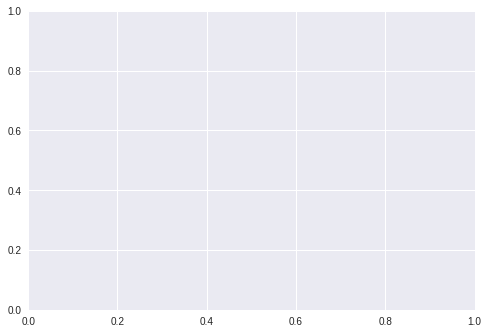

In [373]:
# Show node and edge number
print(nx.nodes(G))
print(nx.number_of_edges(G))
# print(G.adj)

# Specify the position
# pos=nx.get_node_attributes(G,'pos')
pos=nx.spring_layout(G)

print(G.nodes['node1'])
## Node Size 
node_size = [ d["Number of faults, faults/year"]*1 for (n,d) in G.nodes(data=True)]
print(node_size)

nx.draw_networkx_nodes(G, pos, c="w",alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")

## Width Color
for (u,v,d) in G.edges(data=True):
    edge_width = float(d['Line type[1,2,3,4,5]']) * 1
    


# nx.draw_networkx_nodes(G, pos, node_size=15,node_color="white")
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos, alpha=1, edge_color="k", width=edge_width)
nx.draw(G, pos, with_labels=True)
plt.axis('off')
plt.show()

# Show the Node data head

# Function for filling the blank

In [0]:
def Average(lst): 
    return round(sum(lst) / len(lst),2)
  
conductor = [5,	5,	5	,5	,5,	5,5]
terrain = [1,2,3,4,5,6,7,8,9]
SG = [1,2,3,4,5,6,7,8]
terrain_type = [1,2,3,4,5,6,7,8,9,10]
mu_conductor = Average(conductor)
mu_terrain = Average(terrain)
mu_terrain_type = Average(terrain)
mu_sg = Average(SG)


In [90]:
##  Gaussian distribution
def gau(num, list, mu=0, sigma=2):
    s = np.random.normal(mu, sigma, num)
    return s.round(decimals=0)

gau(15,conductor, mu=mu_conductor)
gau(15, terrain, mu=mu_terrain)
gau(14, terrain_type, mu=mu_terrain_type)
# gau(14,SG, mu=mu_sg)
# gau(14, terrain_type, mu=mu_terrain_type)

array([ 3.,  4.,  5.,  9.,  4.,  4.,  7., 11.,  9.,  4.,  3.,  8.,  4.,
        3.])

In [91]:
a = df_arc.iloc[3:,[0]]
a = a.values.tolist()
x = []
for s in a:
    x.extend(s)
    
    
ns=[]
for s in x:
    try:
        ns.append(int(s))
    except ValueError:
        pass
print(ns)    

[2, 10, 1, 1, 1, 1, 5, 6, 3, 4, 4, 1, 0, 6, 0, 4, 0, 5, 0, 0, 15, 8]


In [83]:

df_node.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Index,,,,,,,,,,,,,,,
Node,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Flag
Node x,1,1,2,2,2,4,4,5,6,7,8,9,10,12,13
Node y,2,5,3,4,13,11,12,6,7,8,9,10,11,13,14
"Voltage level, kV",110/10,110/35/10/6,110/35/6,110/35/6,110/10,35/6,110/35/6,110/35/6,110/10/6,110/35/10,110/10,110/10,110/35/6,35/6,
Generation [0/1],0,1,0,0,0,0,1,0,0,1,1,0,0,0,


## Drop unnecessary row and columns

In [50]:
# df_node = df_node.drop("Node", axis=0)
# df_node = df_node.drop(15, axis=1)
df_node.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Index,,,,,,,,,,,,,,
"Voltage level, kV",110/10,110/35/10/6,110/35/6,110/35/6,110/10,35/6,110/35/6,110/35/6,110/10/6,110/35/10,110/10,110/10,110/35/6,35/6
Generation [0/1],0,1,0,0,0,0,1,0,0,1,1,0,0,0
"Generation, kWh",0,925,0,0,0,0,1000,0,0,2000,1000,0,0,0
"Generation Capacity, MW",0,0.925,0,0,0,0,1,0,0,2,1,0,0,0
"Interrupted capacity, MW",0,7.45E-04,0,0,0,0,8.06E-04,0,0,1.61E-03,8.06E-04,0,0,0


## Transpose the table

In [0]:
df_node = df_node.T

## Change the index name

In [64]:
df_node.index = ["node1", "node2", "node3", "node4", "node5", "node6", "node7", "node8", "node9", "node10", "node11", "node12", "node13", "node14"]
df_node

Index,"Voltage level, kV",Generation [0/1],"Generation, kWh","Generation Capacity, MW","Interrupted capacity, MW",Probability of loss of capacity,"Transformer, pcs [0,1,2]","Transformer type [1,2,3]",Transfromer life expectancy value,"Conductor weight value, kg/Trfo",...,EIR value,Investment value,Repair costs value (construction cost),Maintenance costs value,"Investment value, €","Investment value, €/km","Repair costs value, €","Repair costs value, €/km","Maintenance costs value, €","Maintenance costs value, €/km per year"
node1,110/10,0,0,0,0,0,1,1,0.22,0.61,...,0.69,0.56,0.59,0.67,"51,340","25,670","6,340","3,170","2,340","1,170"
node2,110/35/10/6,1,925,0.925,7.45E-04,3.67E-03,2,1+3,0.22,1.00,...,0.58,1.00,1.00,1.00,"132,400","44,133","15,400","5,133","5,000","1,667"
node3,110/35/6,0,0,0,0,0,1,2,0.22,0.57,...,0.58,0.27,0.35,0.55,"26,500","13,250","4,000","2,000","2,000","1,000"
node4,110/35/6,0,0,0,0,0,1,2,0.22,0.57,...,0.33,0.08,0.10,0.15,"26,500","5,300","4,000",800,"2,000",400
node5,110/10,0,0,0,0,0,1,1,0.22,0.61,...,0.46,0.26,0.26,0.28,"51,340","12,835","6,340","1,585","2,340",585
node6,35/6,0,0,0,0,0,1,3,0.22,0.00,...,0.19,0.00,0.00,0.00,"16,060","2,008","2,560",320,"1,360",170
node7,110/35/6,1,1000,1,8.06E-04,3.97E-03,1,2,0.22,0.57,...,0.19,0.16,0.21,0.33,"26,500","8,833","4,000","1,333","2,000",667
node8,110/35/6,0,0,0,0,0,1,2,0.22,0.57,...,0.33,0.16,0.21,0.33,"26,500","8,833","4,000","1,333","2,000",667
node9,110/10/6,0,0,0,0,0,1,2,0.22,0.57,...,0.19,0.08,0.10,0.15,"26,500","5,300","4,000",800,"2,000",400
node10,110/35/10,1,2000,2,1.61E-03,7.94E-03,2,1+3,0.22,1.00,...,0.58,0.48,0.47,0.44,"132,400","22,067","15,400","2,567","5,000",833


Index(['Voltage level, kV', 'Generation [0/1]', 'Generation, kWh',
       'Generation Capacity, MW', 'Interrupted capacity, MW',
       'Probability of loss of capacity', 'Transformer, pcs [0,1,2]',
       'Transformer type [1,2,3]', 'Transfromer life expectancy value',
       'Conductor weight value, kg/Trfo',
       ...
       'EIR value', 'Investment value',
       'Repair costs value (construction cost)', 'Maintenance costs value',
       'Investment value, €', 'Investment value, €/km',
       'Repair costs value, €', 'Repair costs value, €/km',
       'Maintenance costs value, €', 'Maintenance costs value, €/km per year'],
      dtype='object', name='Index', length=115)

In [71]:
nodeData = pd.DataFrame({'name' : ['Amy', 'Bob', 'Cindy'],
                  'type' : ['Foo', 'Bar', 'Baz'],
                  'gender' : ['M', 'F', 'M']})
nodeData

,gender,name,type
0,M,Amy,Foo
1,F,Bob,Bar
2,M,Cindy,Baz


In [69]:
G = nx.from_pandas_edgelist(df_node,source = "node1", target = "node2")

KeyError: ignored

In [0]:
# Show node and edge number
print(nx.nodes(G))
print(nx.number_of_edges(G))
# print(G.adj)


# Specify the position
pos=nx.get_node_attributes(G,'pos')
print(pos)

# nx.draw_networkx_nodes(G, pos, node_size=15,node_color="white")
plt.figure(figsize=(6, 6))
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_nodes(G, pos)
nx.draw(G, pos, with_labels=True)
plt.axis('off')
plt.show()